In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Data Collection
titanic_data = pd.read_csv("/content/drive/MyDrive/titanic3.csv")


In [4]:
print(titanic_data.columns)


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [6]:
titanic_data.isnull().sum()

pclass        1
survived      1
age           0
sibsp         1
parch         1
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

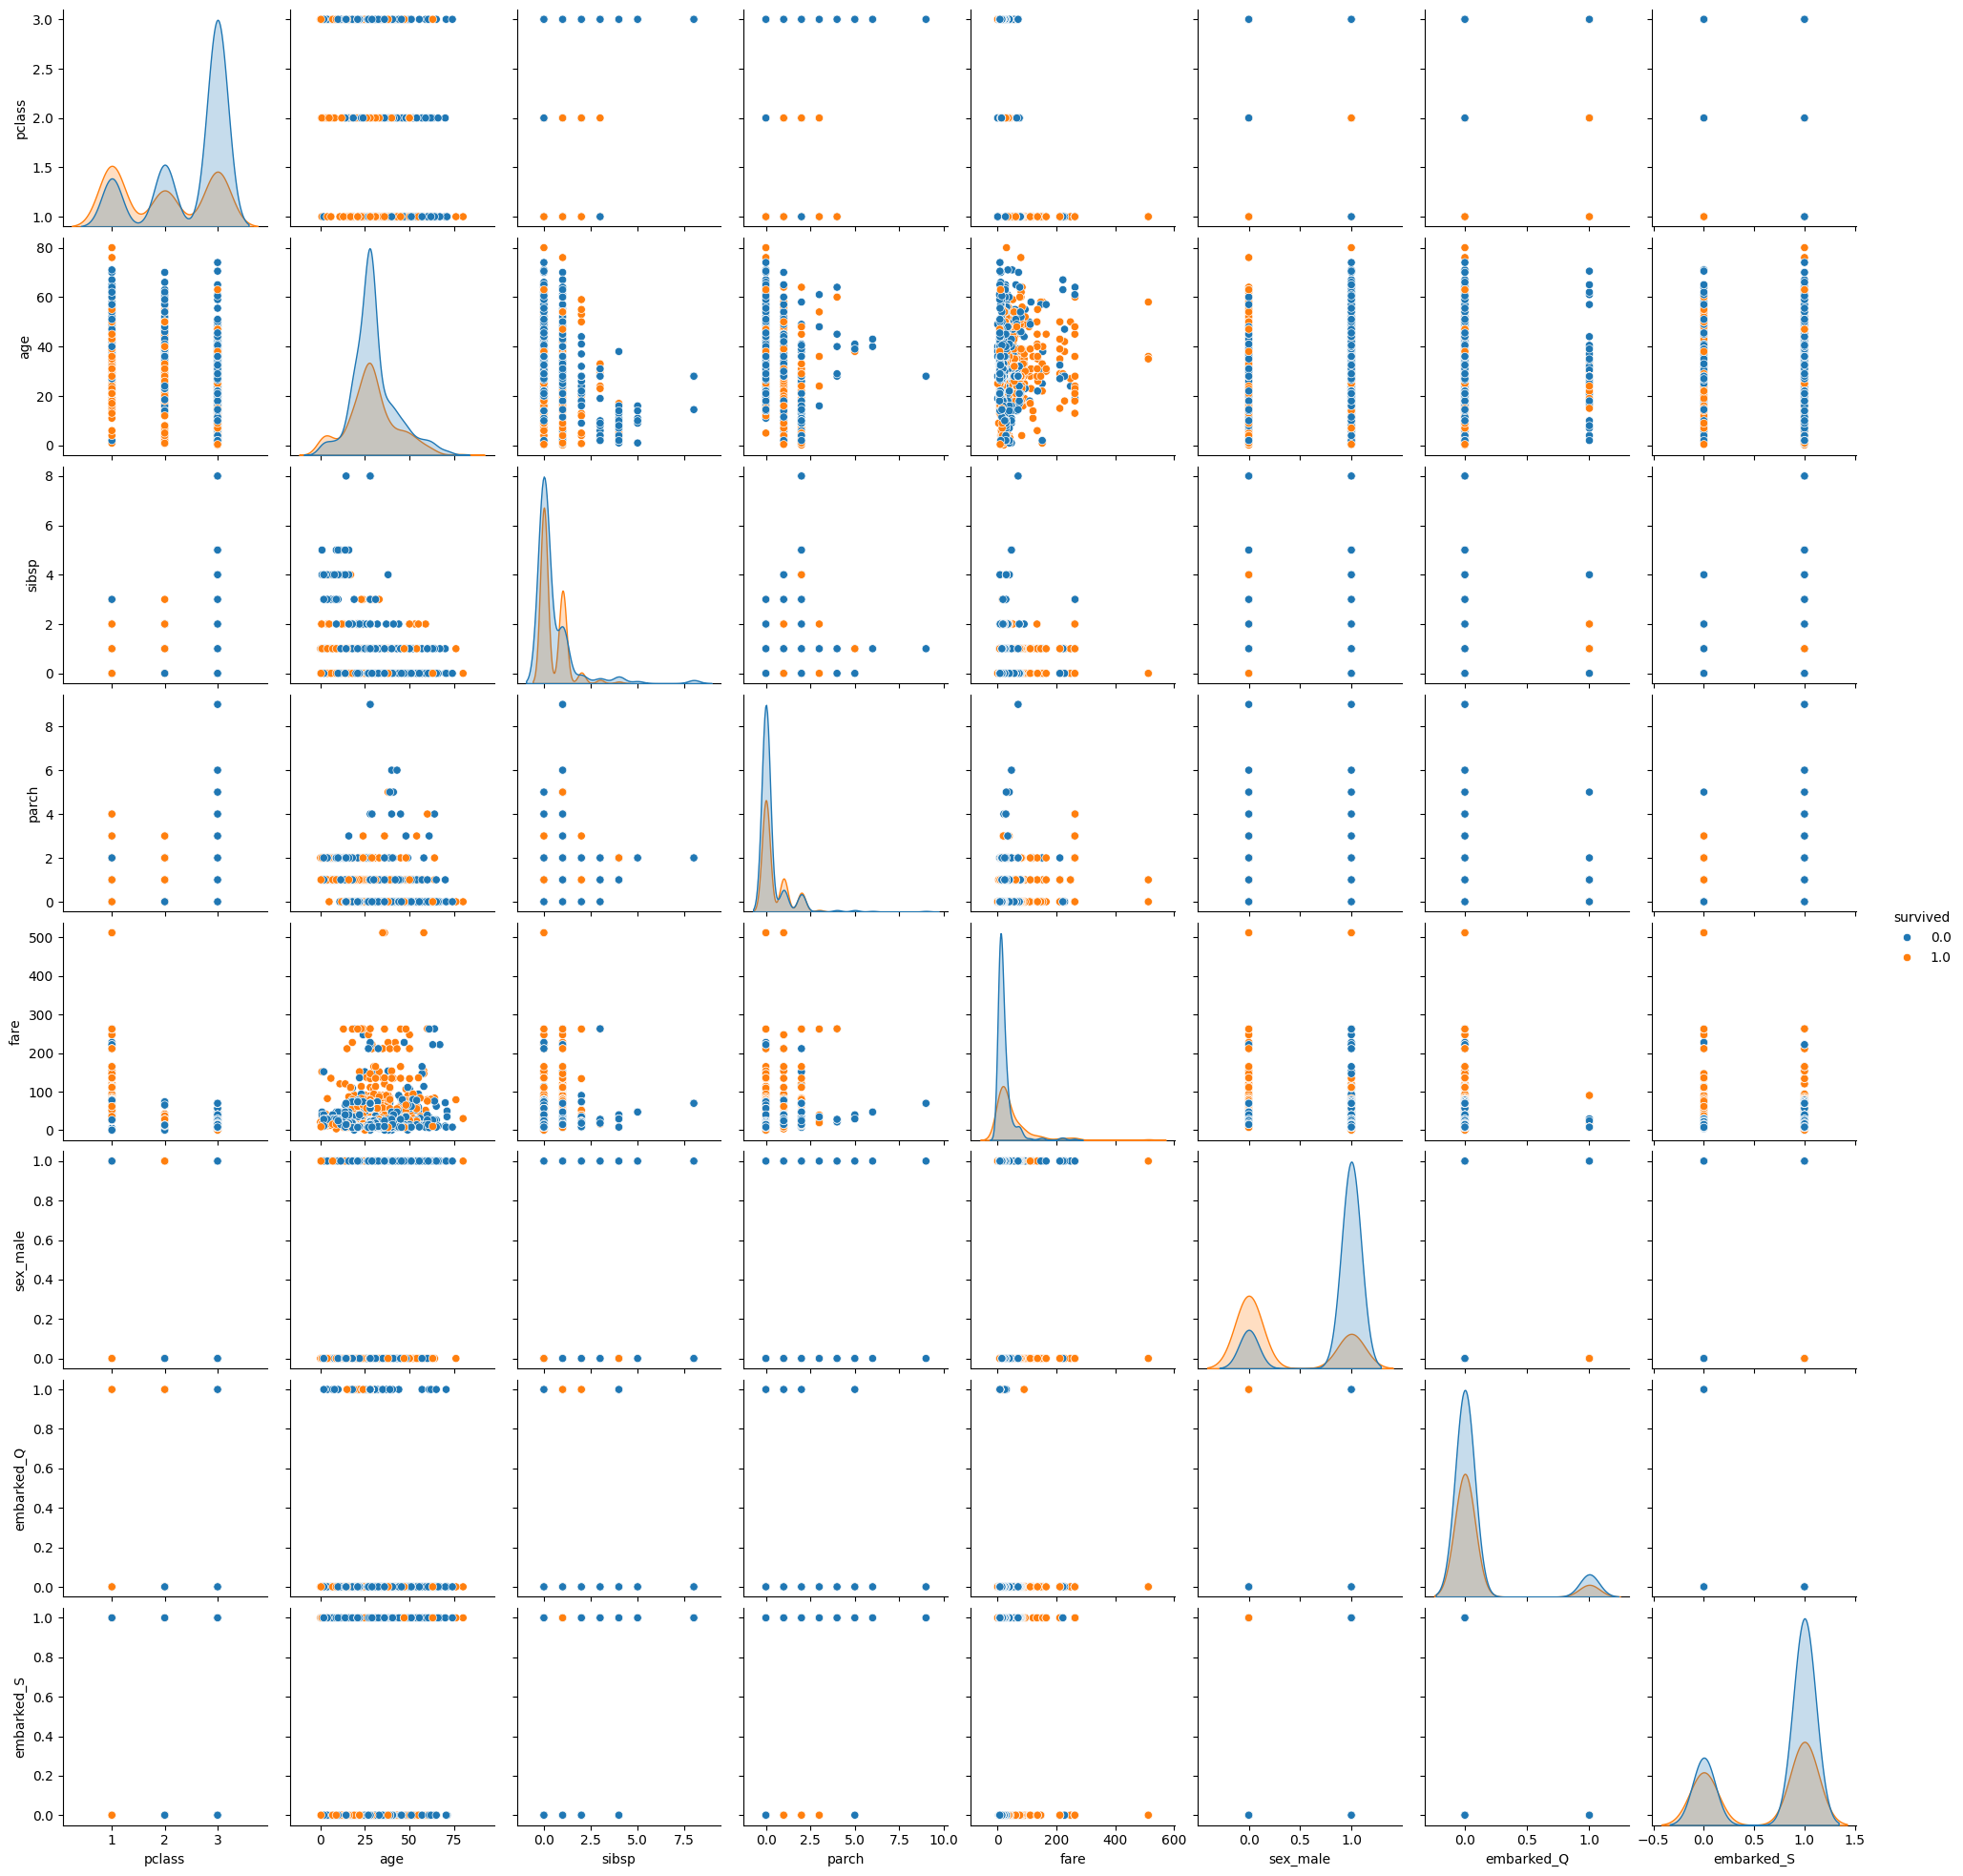

<bound method BaseForest.fit of RandomForestClassifier()>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Step 1: Data Collection
titanic_data = pd.read_csv("/content/drive/MyDrive/titanic3.csv")

# Step 2: Data Preprocessing
# Drop irrelevant columns
titanic_data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# Handle missing values
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'], drop_first=True)

# Step 3: Exploratory Data Analysis (EDA)
sns.pairplot(titanic_data, hue='survived')
plt.show()

# Step 4: Feature Selection
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']

# Step 5: Model Selection
X = titanic_data[features]
y = titanic_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 6: Model Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit